In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [48]:
import numpy as np
import pandas as pd
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import precision_recall_curve
from pandas import DataFrame, Series
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, classification_report, recall_score, accuracy_score, precision_score, confusion_matrix
%matplotlib inline

In [57]:
dt = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/aggregated_taxi_and_bus_data_with_lid.csv')

In [58]:
dt.head()

,timekey,locationID,BusesThatReachedStop,BusesThatReachedLate,OnTimeBuses,AvgLeadTime,AvgLateTime,TaxiTripsBookedAtTimeSlot,TaxiAvgFareAtTimeSlot,TaxiAvgPassAtTimeSlot,TaxiTotalFareAtTimeSlot,TaxiAvgTripDistAtTimeSlot,TaxiAvgTripTimeAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiAvgFareAtTMinusFiveSlot,TaxiAvgPassAtTMinusFiveSlot,TaxiTotalFareAtTMinusFiveSlot,TaxiAvgTripDistAtTMinusFiveSlot,TaxiAvgTripTimeAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiAvgFareAtTMinusTenSlot,TaxiAvgPassAtTMinusTenSlot,TaxiTotalFareAtTMinusTenSlot,TaxiAvgTripDistAtTMinusTenlot,TaxiAvgTripTimeAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,TaxiAvgFareAtTMinusFifteenSlot,TaxiAvgPassAtTMinusFifteenSlot,TaxiTotalFareAtTMinusFifteenSlot,TaxiAvgTripDistAtTMinusFifteenSlot,TaxiAvgTripTimeAtTMinusFifteenSlot,TaxiTripsBookedAtTMinusTwentySlot,TaxiAvgFareAtTMinusTwentySlot,TaxiAvgPassAtTMinusTwentySlot,TaxiTotalFareAtTMinusTwentySlot,TaxiAvgTripDistAtTMinusTwentySlot,TaxiAvgTripTimeAtTMinusTwentySlot
0,2017-10-14 08:10:00 UTC,42,1,0,1,1.0,0.0,2,0.000000e+00,1.500000,0.0,0,14.000000,2,0.000000e+00,1.50,0.000000e+00,0,9.00,1,0.0,1.0,0.0,0,8.0,2,0.000000e+00,2.0,0.0,0,8.000000,2,0.000000e+00,2.000000,-1.500000e-08,0,17.5
1,2017-10-15 21:50:00 UTC,125,1,0,1,19.0,0.0,6,-1.400000e-08,1.333333,0.0,0,14.833333,4,-1.000000e-08,1.75,-1.000000e-08,0,14.25,1,0.0,2.0,0.0,0,4.0,6,-7.000000e-09,1.5,0.0,0,12.833333,5,0.000000e+00,1.000000,0.000000e+00,0,6.4
2,2017-10-20 19:10:00 UTC,232,1,0,1,21.0,0.0,1,0.000000e+00,1.000000,0.0,0,8.000000,2,-2.100000e-08,2.50,0.000000e+00,0,20.50,1,0.0,1.0,0.0,0,8.0,4,-2.600000e-08,1.0,0.0,0,35.500000,3,-1.800000e-08,2.333333,0.000000e+00,0,46.0
3,2017-10-25 06:50:00 UTC,209,1,0,1,1.0,0.0,1,-3.700000e-08,1.000000,0.0,0,22.000000,4,-2.100000e-08,1.50,0.000000e+00,0,13.50,1,0.0,1.0,0.0,0,79.0,1,0.000000e+00,1.0,0.0,0,17.000000,3,-3.400000e-08,1.000000,-1.400000e-08,0,25.0
4,2017-10-25 19:30:00 UTC,232,1,0,1,2.0,0.0,3,-8.000000e-09,1.000000,0.0,0,13.000000,2,0.000000e+00,3.00,0.000000e+00,0,16.50,1,0.0,1.0,0.0,0,22.0,2,0.000000e+00,1.5,0.0,0,7.000000,5,0.000000e+00,1.800000,-7.000000e-09,0,10.8


In [59]:
dt.columns

Index(['timekey', 'locationID', 'BusesThatReachedStop', 'BusesThatReachedLate',
       'OnTimeBuses', 'AvgLeadTime', 'AvgLateTime',
       'TaxiTripsBookedAtTimeSlot', 'TaxiAvgFareAtTimeSlot',
       'TaxiAvgPassAtTimeSlot', 'TaxiTotalFareAtTimeSlot',
       'TaxiAvgTripDistAtTimeSlot', 'TaxiAvgTripTimeAtTimeSlot',
       'TaxiTripsBookedAtTMinusFiveSlot', 'TaxiAvgFareAtTMinusFiveSlot',
       'TaxiAvgPassAtTMinusFiveSlot', 'TaxiTotalFareAtTMinusFiveSlot',
       'TaxiAvgTripDistAtTMinusFiveSlot', 'TaxiAvgTripTimeAtTMinusFiveSlot',
       'TaxiTripsBookedAtTMinusTenSlot', 'TaxiAvgFareAtTMinusTenSlot',
       'TaxiAvgPassAtTMinusTenSlot', 'TaxiTotalFareAtTMinusTenSlot',
       'TaxiAvgTripDistAtTMinusTenlot', 'TaxiAvgTripTimeAtTMinusTenSlot',
       'TaxiTripsBookedAtTMinusFifteenSlot', 'TaxiAvgFareAtTMinusFifteenSlot',
       'TaxiAvgPassAtTMinusFifteenSlot', 'TaxiTotalFareAtTMinusFifteenSlot',
       'TaxiAvgTripDistAtTMinusFifteenSlot',
       'TaxiAvgTripTimeAtTMinusFifteenSlot',
  

# Feature Engineering

In [60]:
def binaryEncode(var):
  if var>0:
    return True
  else:
    return False

In [61]:
dt1 = dt[['timekey','locationID', 'BusesThatReachedLate','TaxiTripsBookedAtTimeSlot','TaxiTripsBookedAtTMinusFiveSlot','TaxiTripsBookedAtTMinusTenSlot','TaxiTripsBookedAtTMinusFifteenSlot']]

In [62]:
dt1['HasLateBuses'] = dt1['BusesThatReachedLate'].apply(binaryEncode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
dt1.drop('BusesThatReachedLate', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
dt1['Date'] = pd.to_datetime(dt1['timekey'])
dt1['year'] = pd.DatetimeIndex(dt1['timekey']).year
dt1['month'] = pd.DatetimeIndex(dt1['timekey']).month
dt1['day'] = pd.DatetimeIndex(dt1['timekey']).day
dt1['dayofyear'] = pd.DatetimeIndex(dt1['timekey']).dayofyear
dt1['weekofyear'] = pd.DatetimeIndex(dt1['timekey']).weekofyear
dt1['weekday'] = pd.DatetimeIndex(dt1['timekey']).weekday
dt1['quarter'] = pd.DatetimeIndex(dt1['timekey']).quarter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [65]:
dt1['hour'] = pd.DatetimeIndex(dt1['timekey']).hour
dt1['minute'] = pd.DatetimeIndex(dt1['timekey']).minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
dt1.drop('timekey', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
dt1.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
dt1['HasLateBuses']=dt1['HasLateBuses'].apply(lambda x: 1 if x else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
dt1.head()

,locationID,TaxiTripsBookedAtTimeSlot,TaxiTripsBookedAtTMinusFiveSlot,TaxiTripsBookedAtTMinusTenSlot,TaxiTripsBookedAtTMinusFifteenSlot,HasLateBuses,year,month,day,dayofyear,weekofyear,weekday,quarter,hour,minute
0,42,2,2,1,2,0,2017,10,14,287,41,5,4,8,10
1,125,6,4,1,6,0,2017,10,15,288,41,6,4,21,50
2,232,1,2,1,4,0,2017,10,20,293,42,4,4,19,10
3,209,1,4,1,1,0,2017,10,25,298,43,2,4,6,50
4,232,3,2,1,2,0,2017,10,25,298,43,2,4,19,30


# Correlation Between Attributes and Target Class

In [70]:
column_list = list(dt1.columns)
column_list.remove('HasLateBuses')
for col in column_list:
    print(col, 'correlation with class is:', dt1[col].corr(dt1['HasLateBuses']))

locationID correlation with class is: -0.11424577492731676
TaxiTripsBookedAtTimeSlot correlation with class is: 0.009987031248923152
TaxiTripsBookedAtTMinusFiveSlot correlation with class is: 0.009150109423598155
TaxiTripsBookedAtTMinusTenSlot correlation with class is: 0.009489002884544915
TaxiTripsBookedAtTMinusFifteenSlot correlation with class is: 0.008768325164378551
year correlation with class is: nan
month correlation with class is: -0.005640013611906782
day correlation with class is: -0.01815771957256909
dayofyear correlation with class is: -0.007886265151646374
weekofyear correlation with class is: -0.008802408401794809
weekday correlation with class is: 0.03198608748050453
quarter correlation with class is: -0.0037735939771631633
hour correlation with class is: 0.029607881808925478
minute correlation with class is: -0.003019111286466406


# Model Evaluation

In [74]:
Y = dt1['HasLateBuses']
X = dt1.drop(['HasLateBuses'], axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Gradient Boosting Classifier

Gradient Boosting Classifier is trained with 5-fold cross validation and a set of few hyperparameters on the training set. After hyperparameter tuning, the best selected model will be used on the test set.

In [78]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [79]:
preds = gbc.predict(X_test)
preds_prob = gbc.predict_proba(X_test)[:, 1]


train_preds = gbc.predict(X_train)
train_preds_prob = gbc.predict_proba(X_train)[:, 1]

roc_auc_score_val = roc_auc_score(y_train, train_preds)
f1_score_val = f1_score(y_train, train_preds)
precision = precision_score(y_train, train_preds)
recall = recall_score(y_train, train_preds)
print("Train set results: ",roc_auc_score_val,f1_score_val,precision)
print("F1 Score: ",f1_score_val)
print("Precision: ",precision)
print("Recall Score: ",recall)
print ('ROC AUC Score: ',roc_auc_score_val)

roc_auc_score_val = roc_auc_score(y_test, preds)
f1_score_val = f1_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
print ("Test set results:")
print("F1 Score: ",f1_score(y_test, preds))
print("Precision: ",precision_score(y_test, preds))
print("Recall Score: ",recall_score(y_test, preds))
print ('Accuracy: ',accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

Train set results:  0.5313334356028223 0.8707784603630853 0.7776435585978569
F1 Score:  0.8707784603630853
Precision:  0.7776435585978569
Recall Score:  0.9892574095416969
ROC AUC Score:  0.5313334356028223
Test set results:
F1 Score:  0.8711645702568207
Precision:  0.7787066633882469
Recall Score:  0.9885360801339349
Accuracy:  0.7753553675765239
[[  727  9900]
 [  404 34837]]


In [80]:
gbc.feature_importances_

array([8.28168619e-01, 5.37018029e-03, 5.67966490e-03, 1.50391952e-02,
       1.63301212e-02, 0.00000000e+00, 1.98036421e-03, 1.38634659e-03,
       1.25454259e-02, 2.75348291e-03, 2.14761456e-02, 2.98608578e-03,
       8.58274517e-02, 4.56916557e-04])

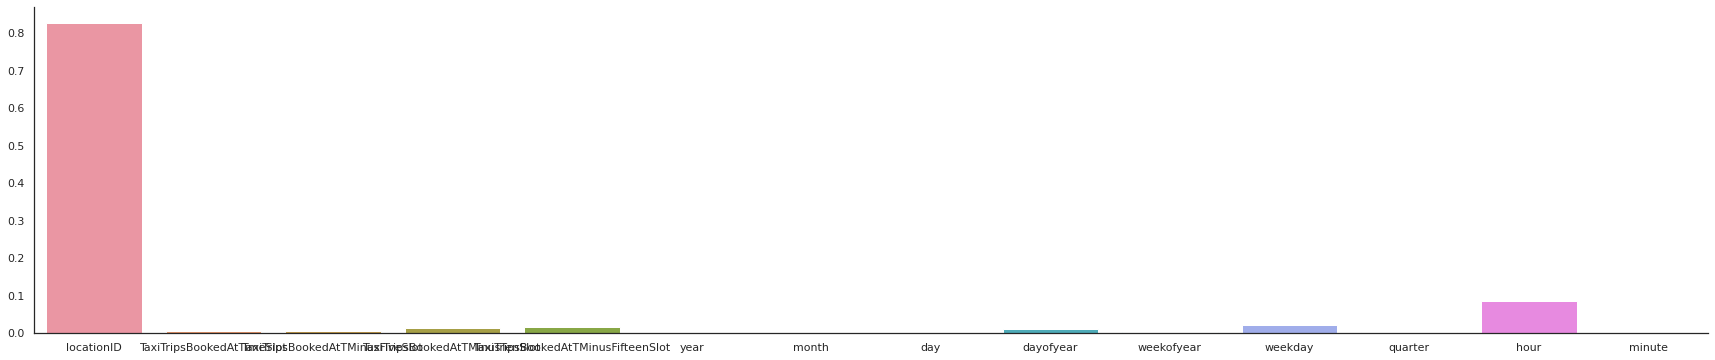

In [81]:
plt.figure(figsize=(30,6))
sns.set(style='white')
ax = sns.barplot(x = X.columns, y = gbc.feature_importances_)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.grid(False)

In [82]:
prob_scores = gbc.predict_proba(X_test)
prob_scores = DataFrame(prob_scores).iloc[:,1]

In [83]:
fpr,tpr,thresholds = roc_curve(y_test, prob_scores)

Best Threshold=0.761426, G-Mean=0.659


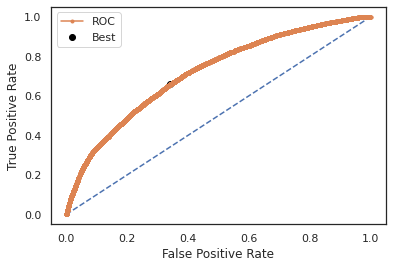

In [84]:
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Decision Tree and Naive Bayes

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from numpy import mean

In [86]:
dtmodel = DecisionTreeClassifier(random_state=0, max_depth=10)
gnbmodel = GaussianNB()

models =[dtmodel, gnbmodel]

score_lst = []
mean_score_lst = []
j = 0
model_list = ['Decision Tree', 'Naive Bayes']

for model in models:
    scores = cross_validate(model, X_train, y_train, scoring = ['accuracy','precision','recall','f1'], cv=5)
    scores = pd.DataFrame(scores)
    score_lst.append(scores.drop(['fit_time', 'score_time'], axis = 1))
    mean_score = pd.DataFrame(scores.mean()).drop(index = ['fit_time', 'score_time'])
    mean_score = mean_score.rename(columns={0: model_list[j]})
    mean_score_lst.append(mean_score)
    j +=1

In [87]:
print('Decision Tree performance on 5 folds is:', '\n')
score_lst[0]

Decision Tree performance on 5 folds is: 



,test_accuracy,test_precision,test_recall,test_f1
0,0.780515,0.798293,0.954754,0.869541
1,0.777953,0.795804,0.955288,0.868283
2,0.780346,0.801135,0.948812,0.868742
3,0.777402,0.794368,0.957242,0.868233
4,0.779746,0.797463,0.955073,0.869181


In [88]:
print('Decision Tree Mean performance on 5 folds is:', '\n')
mean_score_lst[0]

Decision Tree Mean performance on 5 folds is: 



,Decision Tree
test_accuracy,0.779192
test_precision,0.797413
test_recall,0.954234
test_f1,0.868796


In [89]:
print('Naive Bayes performance on 5 folds is:', '\n')
score_lst[1]

Naive Bayes performance on 5 folds is: 



,test_accuracy,test_precision,test_recall,test_f1
0,0.756452,0.766067,0.981966,0.860684
1,0.755117,0.766148,0.979262,0.859695
2,0.758189,0.766446,0.984313,0.861824
3,0.759361,0.766680,0.985949,0.862598
4,0.755028,0.766167,0.979048,0.859624


In [90]:
print('Naive Bayes Mean performance on 5 folds is:', '\n')
mean_score_lst[1]

Naive Bayes Mean performance on 5 folds is: 



,Naive Bayes
test_accuracy,0.756829
test_precision,0.766301
test_recall,0.982108
test_f1,0.860885


In [91]:
result = pd.concat(mean_score_lst, axis = 1)
result

,Decision Tree,Naive Bayes
test_accuracy,0.779192,0.756829
test_precision,0.797413,0.766301
test_recall,0.954234,0.982108
test_f1,0.868796,0.860885


# Fitting with Decision Tree

In [92]:
from sklearn import metrics

In [93]:
dtmodel.fit(X_train, y_train)
y_pred = dtmodel.predict(X_test)
report = metrics.classification_report(y_test, y_pred, output_dict=True)
classification_report = pd.DataFrame(report).transpose()

In [94]:
classification_report

,precision,recall,f1-score,support
0,0.568683,0.206079,0.302528,10627.000000
1,0.799200,0.952867,0.869295,35241.000000
accuracy,0.779847,0.779847,0.779847,0.779847
macro avg,0.683942,0.579473,0.585912,45868.000000
weighted avg,0.745793,0.779847,0.737983,45868.000000


# Fitting with Naive Bayes

In [95]:
gnbmodel.fit(X_train, y_train)
y_pred = gnbmodel.predict(X_test)
report = metrics.classification_report(y_test, y_pred, output_dict=True)
classification_report = pd.DataFrame(report).transpose()

In [96]:
classification_report

,precision,recall,f1-score,support
0,0.252061,0.020137,0.037295,10627.000000
1,0.768698,0.981981,0.862347,35241.000000
accuracy,0.759135,0.759135,0.759135,0.759135
macro avg,0.510379,0.501059,0.449821,45868.000000
weighted avg,0.649000,0.759135,0.671194,45868.000000


# LightGBM

In [97]:
import lightgbm as lgb 

In [98]:
train_data=lgb.Dataset(X_train,label=y_train)

In [99]:
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [100]:
num_round=50
lgbm=lgb.train(param,train_data,num_round)

In [101]:
ypred2=lgbm.predict(X_test)